<a href="https://colab.research.google.com/github/rajkumarshedage/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name - Health Insurance Cross Sell Prediction
## Project Type - Classification
## Contribution - Individual
### GitHub Link
https://github.com/rajkumarshedage/Health-Insurance-Cross-Sell-Prediction

### Problem Statement
#### Business Problem Overview
An insurance company is looking to build a model to predict whether their past health insurance policyholders would also be interested in purchasing vehicle insurance from the company.

An insurance policy is a contract where the company agrees to provide compensation for specific losses, injuries, or death in exchange for regular payments called premiums.

In this case, the company wants to use information about the customer's demographics, vehicle details, and previous insurance policy information to predict their interest in vehicle insurance.

This information would be used to target marketing efforts and optimize the company's revenue.

## Business Objective
The business objective for a health insurance cross-sell prediction is to identify potential customers who are likely to purchase additional products.

This allows the insurance company to target their marketing efforts towards these individuals, potentially increasing sales and revenue.

Additionally, by identifying and targeting high-risk customers, the insurance company can also improve their risk management and profitability.

In [ ]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Dataset Loading

data = pd.read_csv('/content/drive/MyDrive/Projects_DS/Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
## Viewing data's first 5 row

data.head()

In [ ]:
# Checking shape of data

data.shape

### Data has 381109 rows and 12 columns.
### Variables Description
id : Unique ID for customer

Gender : Male/Female

Age : Age of customer

Driving License : Customer has DL or not

Region_Code : Unique code for the region of the customer

Previously_insured : Customer already has vehicle insurance or not

Vehicle_age : Age of the vehicle

Vehicle_damage : Past damages present or not

Annual_premium : The amount customer needs to pay as premium

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc

Vintage : Number of Days, Customer has been associated with the company

Response : Customer is interested or not

In [ ]:
## Checking data types

data.dtypes

## Chechking null or missing values

In [ ]:
data.isnull().sum()

### In our data there no null or missing values

## Checking unique values in each feature

In [ ]:
data.nunique()

## Data Describe

In [ ]:
data.describe()

In [ ]:
## Creating copy of the current data and assigning to df

df = data.copy()

In [ ]:
## Creating interested Response dataset

df_Response = df[(df['Response'] == 1)]

In [ ]:
df['Response'].value_counts()

## Exploring Response Labels - Univariate analysis

In [ ]:
df['Response'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Response')

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
Our data is imblance

Any data with unequal class distribution is technically imblance.

In our data 87.7% data not interested Response and remaining 12.3% interested.

### 3. Will the gained insights help creating a positive business impact?
In your case, with 87.7% of the data being "not interested" in purchasing vehicle insurance, and only 12.3% being "interested", the model may not be able to accurately predict the "interested" class. This could lead to a high number of false negatives (predicting "not interested" when the customer is actually "interested") and a low number of true positives (predicting "interested" when the customer is actually "interested").

If the data is highly imbalanced, with a large majority of the data belonging to one class, it can be difficult for a model to accurately predict the minority class. This is because the model will likely be trained to predict the majority class more often, resulting in a higher accuracy overall but a lower accuracy for the minority class.

## Exploring Gender feature - Univariate and Bivariate analysis

In [ ]:
## Number of Unique gender

df['Gender'].unique()

In [ ]:
df['Gender'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Gender')

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
In our data 54.1% Male and 45.9% Female.

In [ ]:
## creating df_genderwise_Response_count%

gender = df['Gender'].unique()
interested_response = [df[(df['Gender'] == gen)]['Response'].value_counts()[1] for gen in gender]
not_interested_response=[df[(df['Gender'] == gen)]['Response'].value_counts()[0] for gen in gender]

df_genderwise_Response_count = pd.DataFrame({'Gender' : gender,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})
df_genderwise_Response_count
df_genderwise_Response_count['interested_response %'] = round(((df_genderwise_Response_count['interested_response'])/
                                                 ((df_genderwise_Response_count['interested_response'])+
                                                         (df_genderwise_Response_count['not_interested_response'])))*100,2)
df_genderwise_Response_count['not_interested_response %'] = round(((df_genderwise_Response_count['not_interested_response'])/
                                                  ((df_genderwise_Response_count['interested_response'])+
                                                         (df_genderwise_Response_count['not_interested_response'])))*100,2)
df_genderwise_Response_count

In [ ]:
## Ploting Response count gender wise

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = df['Gender'],hue = 'Response',data = df)
plt.title('Response count gender wise')

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
There are two gender

interested response of males are 13.84%

interested response of females are 10.39%

### 3. Will the gained insights help creating a positive business impact?
Yes, The insight that the interested response rate for males is higher (13.84%) than for females (10.39%) could be used to inform the company's marketing efforts.

## Exploring Age feature - Univariate and Bivariate analysis

In [ ]:
df['Age'].describe()

In [ ]:
## Creating df of age with respect to interested_response and not_interested_response

Age_interested_response = df[(df['Response'] == 1)]
Age_not_interested_response = df[(df['Response'] == 0)]

In [ ]:
## Mean

print('Mean of Age of all data',df['Age'].mean())
print('Mean of Age of interested response',Age_interested_response['Age'].mean())
print('Mean of Age of not interested response',Age_not_interested_response['Age'].mean())

In [ ]:
## Median

print('Median of Age of all data',df['Age'].median())
print('Median of Age of interested response',Age_interested_response['Age'].median())
print('Median of Age of not interested response',Age_not_interested_response['Age'].median())

In [ ]:
sns.distplot(df['Age'], color='blue' , label = 'All')
sns.distplot(Age_interested_response['Age'],color = 'red' , label='interested_response',hist = False)
sns.distplot(Age_not_interested_response['Age'],color = 'green' , label = 'not_interested_response',hist = False)
plt.legend()

### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

### 2. What is/are the insight(s) found from the chart?
It appears that the mean and median age of customers who are "interested" in purchasing vehicle insurance is higher than the mean and median age of customers who are "not interested" in purchasing vehicle insurance.

The mean age of all customers is 38.82, while the mean age of "interested" customers is 43.44, and the mean age of "not interested" customers is 38.18. Similarly, the median age of all customers is 36.0, while the median age of "interested" customers is 43.0, and the median age of "not interested" customers is 34.0.

### 3. Will the gained insights help creating a positive business impact?
The insights gained from the mean and median age of all data, as well as the mean and median age of the "interested" and "not interested" responses can potentially help create a positive business impact for the insurance company.

From the chart, it appears that the mean and median age of customers who are "interested" in purchasing vehicle insurance is higher than those who are "not interested." This suggests that older customers may be more likely to be interested in purchasing additional insurance policies from the company.

The company can use this information to target their marketing efforts towards older customers, as they may be more likely to respond positively to offers for vehicle insurance.

Additionally, the company may also want to consider offering discounts or promotions to older customers in order to incentivize them to purchase additional policies.

In [ ]:
## Analysing by using boxplot diagram between 'Age' and 'response'

fig = plt.figure(figsize = (10, 8))
df.boxplot(column = 'Age', by = 'Response')
fig.suptitle('Age', fontsize = 14, fontweight = 'bold')
plt.show()

### 1. Why did you pick the specific chart?
boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

### 2. What is/are the insight(s) found from the chart?
the age have some outliers in upper side of interested response

### 3. Will the gained insights help creating a positive business impact?
The insight that age has some outliers in the upper side of the "interested" response in a Health Insurance Cross Sell Prediction, could potentially be useful in creating a positive business impact.

It suggests that older customers may be more likely to be interested in purchasing vehicle insurance from the company. This information can be used to target marketing efforts to older age groups, or to tailor the sales pitch to better appeal to older customers.



## Exploring Driving_License feature - Univariate and Bivariate analysis

In [ ]:
## cheking unique values

df['Driving_License'].unique()

In [ ]:
## checking value count

df['Driving_License'].value_counts()

In [ ]:
## Ploting value counts

df['Driving_License'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Driving_License')

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
Only 0.2% customer did not have Driving License.

In [ ]:
## creating df Driving_License interested Response count%

D_L = df['Driving_License'].unique()
interested_response = [df[(df['Driving_License'] == gen)]['Response'].value_counts()[1] for gen in D_L]
not_interested_response = [df[(df['Driving_License'] == gen)]['Response'].value_counts()[0] for gen in D_L]

df_D_Lrwise_Response_count = pd.DataFrame({'Driving_License' : D_L,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_D_Lrwise_Response_count['interested_response %'] = round(((df_D_Lrwise_Response_count['interested_response'])/
                                                 ((df_D_Lrwise_Response_count['interested_response'])+
                                                         (df_D_Lrwise_Response_count['not_interested_response'])))*100,2)
df_D_Lrwise_Response_count['not_interested_response %'] = round(((df_D_Lrwise_Response_count['not_interested_response'])/
                                                  ((df_D_Lrwise_Response_count['interested_response'])+
                                                         (df_D_Lrwise_Response_count['not_interested_response'])))*100,2)
df_D_Lrwise_Response_count

In [ ]:
## Ploting Response count Driving_License wise

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = df['Driving_License'],hue = 'Response',data = df)
plt.title('Response count Driving License wise')

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
A large percentage of customers with a driving license (12.27%) have shown interest in purchasing health insurance.

A relatively small percentage of customers without a driving license (5.05%) have shown interest in purchasing health insurance.

Having a driving license may be a strong indicator of a customer's likelihood to purchase health insurance.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact. By identifying that a large percentage of customers with a driving license have shown interest in purchasing health insurance, the company can focus their marketing and sales efforts on targeting customers who have a driving license.

This can potentially increase the number of customers interested in purchasing health insurance, resulting in increased revenue for the company.

Additionally, the company can also use this information to develop targeted campaigns and offers for customers who do not have a driving license, in order to increase the percentage of customers without a driving license showing interest in purchasing health insurance.



## Exploring Region Code feature - Univariate and Bivariate analysis

In [ ]:
## cheking unique values

df['Region_Code'].unique()

In [ ]:
## cheking unique values

df['Region_Code'].nunique()

In [ ]:
## checking value count

df['Region_Code'].value_counts()

In [ ]:
## creating df Region_Code interested Response count%

Region_Code = (df['Region_Code'].unique()).astype('int')
interested_response = [df[(df['Region_Code'] == code)]['Response'].value_counts()[1] for code in Region_Code]
not_interested_response = [df[(df['Region_Code'] == code)]['Response'].value_counts()[0] for code in Region_Code]

df_Region_Codewise_Response_count = pd.DataFrame({'Region_Code' : Region_Code,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Region_Codewise_Response_count['interested_response %'] = round(((df_Region_Codewise_Response_count['interested_response'])/
                                                 ((df_Region_Codewise_Response_count['interested_response'])+
                                                         (df_Region_Codewise_Response_count['not_interested_response'])))*100,2)
df_Region_Codewise_Response_count['not_interested_response %'] = round(((df_Region_Codewise_Response_count['not_interested_response'])/
                                                  ((df_Region_Codewise_Response_count['interested_response'])+
                                                         (df_Region_Codewise_Response_count['not_interested_response'])))*100,2)
df_Region_Codewise_Response_count

In [ ]:
df_Region_Codewise_Response_count.sort_values(by = ['interested_response %'],ascending = False)

In [ ]:
## Filtering Region_Code which have interested_response % rate more than 10%

df_Region_Codewise_Response_count_more_10 = df_Region_Codewise_Response_count.sort_values(by = ['interested_response %'],ascending = False)[(df_Region_Codewise_Response_count['interested_response %'] >= 10)]
df_Region_Codewise_Response_count_more_10

In [ ]:
## bar plot of Region_Code which have interested_response % more than 10%

plt.figure(figsize = (30,8))
plt.bar(df_Region_Codewise_Response_count_more_10['Region_Code'].astype('str'),
        df_Region_Codewise_Response_count_more_10['interested_response %'])
plt.title('Region_Code Withinterested_response % More Than 10%')
plt.xlabel('Region_Code')
plt.ylabel('interested_response %')

In [ ]:
## Region_Code having interested_response % more than 10%

df_Region_Codewise_Response_count_more_10['Region_Code'].unique()

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Region_Code '38' have high interested_response % of 19.20 %.

38, 28, 19, 4, 23, 51, 24, 7, 18, 3, 35, 39, 52, 29, 41, 40, 5,20, 11, 45, 1, 46, 48, 31, 33, 12, 8, 43, 14, 13, 47, 0, 32, 9,36, 37, 34, 49, 42, 27, 30, 26, 15, 2, 21, 17, 6, 16, 22, 50, 10, 25, and 44 have interested_response % more than 10%.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact by identifying regions with high interested_response percentages, which can be targeted for cross-selling health insurance. By focusing on these regions, the company may be able to increase their sales and revenue.

Additionally, by identifying regions with interested_response percentages above 10%, the company can also prioritize which regions to focus their marketing efforts on.

In [ ]:
## Filtering Region_Code which have interested_response % rate less than 10%

df_Region_Codewise_Response_count_less_10 = df_Region_Codewise_Response_count.sort_values(by = ['interested_response %'])[(df_Region_Codewise_Response_count['interested_response %']<10)]
df_Region_Codewise_Response_count_less_10

In [ ]:
## bar plot of Region_Code which have interested_response % less than 10%

plt.figure(figsize = (30,8))
plt.bar(df_Region_Codewise_Response_count_less_10['Region_Code'].astype('str'),
        df_Region_Codewise_Response_count_less_10['interested_response %'])
plt.title('Region_Code Withinterested_response % More Than 10%')
plt.xlabel('Region_Code')
plt.ylabel('interested_response %')

In [ ]:
## Region_Code having interested_response % less than 10%

df_Region_Codewise_Response_count_less_10['Region_Code'].unique()

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
Region_Code '44' have less interested_response % of 4.08 %.

Region_Code 44, 25, 10, 50, 22, 16, 6, 17, 21, 2, 15, 26, 30, 27, 42, 49, 34, 37, 36, 9, 32, 0, 47, 13, 14, 43, 8, 12, and 33 have interested_response % less than 10%.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help in creating a positive business impact by targeting the regions with higher interested_response % for cross-selling health insurance products.

By identifying the regions with low interested_response %, the company can focus on strategies to increase awareness and interest in these areas. This can lead to increased sales and revenue for the company.

## Exploring Previously_Insured feature - Univariate and Bivariate analysis

In [ ]:
## cheking unique values

df['Previously_Insured'].unique()

In [ ]:
## checking value count

df['Previously_Insured'].value_counts()

In [ ]:
## Ploting value counts

df['Previously_Insured'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Previously Insured')

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
45.8% Customer already has vehicle insurance

54.2% Customer did not has vehicle insurance

In [ ]:
## creating df Previously_Insured interested Response count%

Previously_Insured = (df['Previously_Insured'].unique())
interested_response = [df[(df['Previously_Insured'] == code)]['Response'].value_counts()[1] for code in Previously_Insured]
not_interested_response = [df[(df['Previously_Insured'] == code)]['Response'].value_counts()[0] for code in Previously_Insured]

df_Previously_Insured_Response_count = pd.DataFrame({'Previously_Insured' : Previously_Insured,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Previously_Insured_Response_count['interested_response %'] = round(((df_Previously_Insured_Response_count['interested_response'])/
                                                 ((df_Previously_Insured_Response_count['interested_response'])+
                                                         (df_Previously_Insured_Response_count['not_interested_response'])))*100,2)
df_Previously_Insured_Response_count['not_interested_response %'] = round(((df_Previously_Insured_Response_count['not_interested_response'])/
                                                  ((df_Previously_Insured_Response_count['interested_response'])+
                                                         (df_Previously_Insured_Response_count['not_interested_response'])))*100,2)
df_Previously_Insured_Response_count

In [ ]:
## Ploting interested_response % of Previously_Insured


plt.bar(df_Previously_Insured_Response_count['Previously_Insured'].astype('str'),
        df_Previously_Insured_Response_count['Previously_Insured'])
plt.xlabel("Previously_Insured")
plt.ylabel("interested_response %")
plt.title("interested_response % of Previously Insured")

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to International plan, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
customer Previously Insured 206480 out that 46552 have an interested response which is 22.55% of customers Previously Insured

customer Previously not Insured 174628 out of that 158 have interested responses which are 0.09% of the customer not Previously Insured

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact. Based on the data, it appears that customers who were previously insured have a much higher likelihood of responding positively to a cross-sell offer for health insurance. This means that the company could potentially target their marketing efforts towards previously insured customers, which would likely result in a higher conversion rate and ultimately a positive impact on the business.

The low response rate among customers who were not previously insured suggests that it may not be as effective to target them for cross-sell offers, which could help the company save resources and optimize their marketing efforts.

## Exploring Vehicle_Age feature - Univariate and Bivariate analysis

In [ ]:
## cheking unique values

df['Vehicle_Age'].unique()

In [ ]:
## checking value count

df['Vehicle_Age'].value_counts()

In [ ]:
## Ploting value counts

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = df['Vehicle_Age'],data = df)
plt.title('Pie Chart For Vehicle Age')

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the count of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
There is 200316 vehicles age between 1-2 Years.

There is 164786 vehicles age < 1 Year.

There is 16007 vehicles age > 2 Years.

In [ ]:
## creating df Vehicle_Age interested Response count%

Vehicle_Age = (df['Vehicle_Age'].unique())
interested_response = [df[(df['Vehicle_Age'] == code)]['Response'].value_counts()[1] for code in Vehicle_Age]
not_interested_response = [df[(df['Vehicle_Age'] == code)]['Response'].value_counts()[0] for code in Vehicle_Age]

df_Previously_Vehicle_Age_count=pd.DataFrame({'Vehicle_Age' : Vehicle_Age,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Previously_Vehicle_Age_count['interested_response %'] = round(((df_Previously_Vehicle_Age_count['interested_response'])/
                                                 ((df_Previously_Vehicle_Age_count['interested_response'])+
                                                         (df_Previously_Vehicle_Age_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Age_count['not_interested_response %'] = round(((df_Previously_Vehicle_Age_count['not_interested_response'])/
                                                  ((df_Previously_Vehicle_Age_count['interested_response'])+
                                                         (df_Previously_Vehicle_Age_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Age_count

In [ ]:
## Ploting churn rate % of each area

plt.bar(df_Previously_Vehicle_Age_count['Vehicle_Age'],df_Previously_Vehicle_Age_count['interested_response %'])
plt.xlabel("Vehicle_Age")
plt.ylabel("interested_response %")
plt.title("interested_response % of each Vehicle_Age")

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
There is three vehicle age i.g. 1-2 Year, < 1 Year, > 2 Years

vehicle age > 2 Years have 29.37% interested response vehicle age 1-2 Year have 17.38% interested response vehicle age < 1 Year have 4.37% interested response

The insight found from the chart is that people with vehicle age older than 2 years are more likely to show interest in purchasing insurance compared to those with vehicle age 1-2 years and less than 1 year.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact as it can guide the insurance company to focus their marketing efforts towards people with vehicles older than 2 years.

By targeting this group, the company may see an increase in their health insurance cross-sell and potentially result in higher sales and revenue.

This information can be used to design targeted marketing campaigns, promotions and incentives that may further increase the interest among this group.

## Exploring Vehicle_Damage feature - Univariate and Bivariate analysis

In [ ]:
## cheking unique values

df['Vehicle_Damage'].unique()

In [ ]:
## checking value count

df['Vehicle_Damage'].value_counts()

In [ ]:
## Ploting value counts

df['Vehicle_Damage'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Vehicle_Damage')

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
Past damages present in 50.5% customer.

No Past damages present in 49.5% customer.

In [ ]:
## creating df Vehicle_Damage interested Response count%

Vehicle_Damage = (df['Vehicle_Damage'].unique())
interested_response = [df[(df['Vehicle_Damage'] == code)]['Response'].value_counts()[1] for code in Vehicle_Damage]
not_interested_response=[df[(df['Vehicle_Damage'] == code)]['Response'].value_counts()[0] for code in Vehicle_Damage]

df_Previously_Vehicle_Damage_count=pd.DataFrame({'Vehicle_Damage' : Vehicle_Damage,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Previously_Vehicle_Damage_count['interested_response %'] = round(((df_Previously_Vehicle_Damage_count['interested_response'])/
                                                 ((df_Previously_Vehicle_Damage_count['interested_response'])+
                                                         (df_Previously_Vehicle_Damage_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Damage_count['not_interested_response %'] = round(((df_Previously_Vehicle_Damage_count['not_interested_response'])/
                                                  ((df_Previously_Vehicle_Damage_count['interested_response'])+
                                                         (df_Previously_Vehicle_Damage_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Damage_count

In [ ]:
## Ploting 	interested_response % of Vehicle_Damage

plt.bar(df_Previously_Vehicle_Damage_count['Vehicle_Damage'].astype('str'),df_Previously_Vehicle_Damage_count['interested_response %'])
plt.xlabel("Vehicle_Damage")
plt.ylabel("interested_response %")
plt.title("interested_response % of Vehicle_Damage")

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to International plan, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
There are Past Vehicle damages present then 23.77% of customers have an interested response

There are No Vehicle Past damages present in then 0.52 % of customers have interested response

The insight found from the chart is that customers with a history of vehicle damages are more likely to respond positively to a cross-sell offer for insurance.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insight can help create a positive business impact. By targeting customers with a history of vehicle damages, the company can increase the chances of a successful cross-sell campaign and potentially increase sales revenue.

## Exploring Annual_Premium feature - Univariate and Bivariate analysis

In [ ]:
df['Annual_Premium'].describe()

In [ ]:
## Creating Annual_Premium interested or not interested Response df

Annual_Premium_interested = df[(df['Response'] == 1)]
Annual_Premium_not_interested = df[(df['Response'] == 0)]

In [ ]:
## Mean

print('Mean of Annual_Premium of all data',df['Annual_Premium'].mean())
print('Mean of Annual_Premium of interested Response',Annual_Premium_not_interested['Annual_Premium'].mean())
print('Mean of Annual_Premium of Not interested Response',Annual_Premium_not_interested['Annual_Premium'].mean())
print()

## Median


print('Median of Annual_Premium of all data',df['Annual_Premium'].median())
print('Median of Annual_Premium of interested Response',Annual_Premium_not_interested['Annual_Premium'].median())
print('Median of Annual_Premium of Not interested Response',Annual_Premium_not_interested['Annual_Premium'].median())

In [ ]:
sns.distplot(df['Annual_Premium'], color = 'blue' , label = 'All')
sns.distplot(Annual_Premium_interested['Annual_Premium'],color = 'red' , label = 'interested Response',hist = False)
sns.distplot(Annual_Premium_not_interested['Annual_Premium'],color = 'green' , label = 'Not interested Response',hist = False)
plt.legend()

### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

### 2. What is/are the insight(s) found from the chart?
The insights found from the chart show that the mean and median of the annual premium for all data, interested response, and not interested response are similar, with only a slight difference in values.

## Exploring Vintage feature - Univariate and Bivariate analysis

In [ ]:
## Creating Vintage interested or not interested Response df

Vintage_interested = df[(df['Response'] == 1)]
Vintage_not_interested = df[(df['Response'] == 0)]

In [ ]:
## Mean

print('Mean of Vintage of all data',df['Vintage'].mean())
print('Mean of Vintage of interested Response',Annual_Premium_not_interested['Vintage'].mean())
print('Mean of Vintage of Not interested Response',Annual_Premium_not_interested['Vintage'].mean())
print()

## Median


print('Median of Vintage of all data',df['Vintage'].median())
print('Median of Vintage of interested Response',Annual_Premium_not_interested['Vintage'].median())
print('Median of Vintage of Not interested Response',Annual_Premium_not_interested['Vintage'].median())

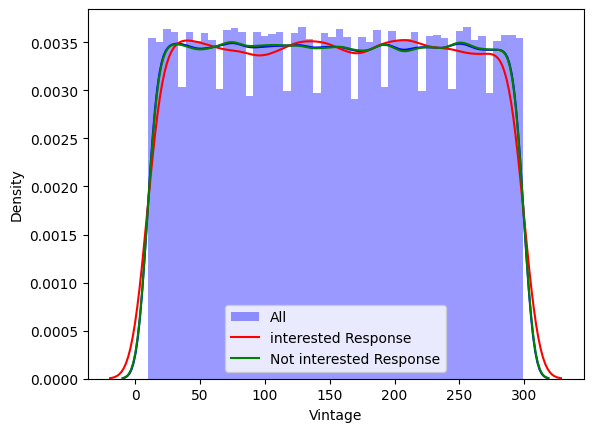

In [122]:
sns.distplot(df['Vintage'], color = 'blue' , label = 'All')
sns.distplot(Annual_Premium_interested['Vintage'],color = 'red' , label = 'interested Response',hist = False)
sns.distplot(Annual_Premium_not_interested['Vintage'],color = 'green' , label = 'Not interested Response',hist = False)
plt.legend()

### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

### 2. What is/are the insight(s) found from the chart?
The mean and median of the number of days a customer has been associated with the company for all data, interested response and not interested response are very similar, indicating that the length of customer association with the company does not have a significant impact on their interest in purchasing health insurance cross sell.

The mean and median number of days for all data, interested response, and not interested response is 154, indicating that the majority of customers have been associated with the company for around 154 days.

### 3. Will the gained insights help creating a positive business impact?
This indicates that the length of time a customer has been associated with the company does not have a significant impact on their likelihood of being interested in purchasing additional health insurance.

## Correlation Heatmap

<Axes: >

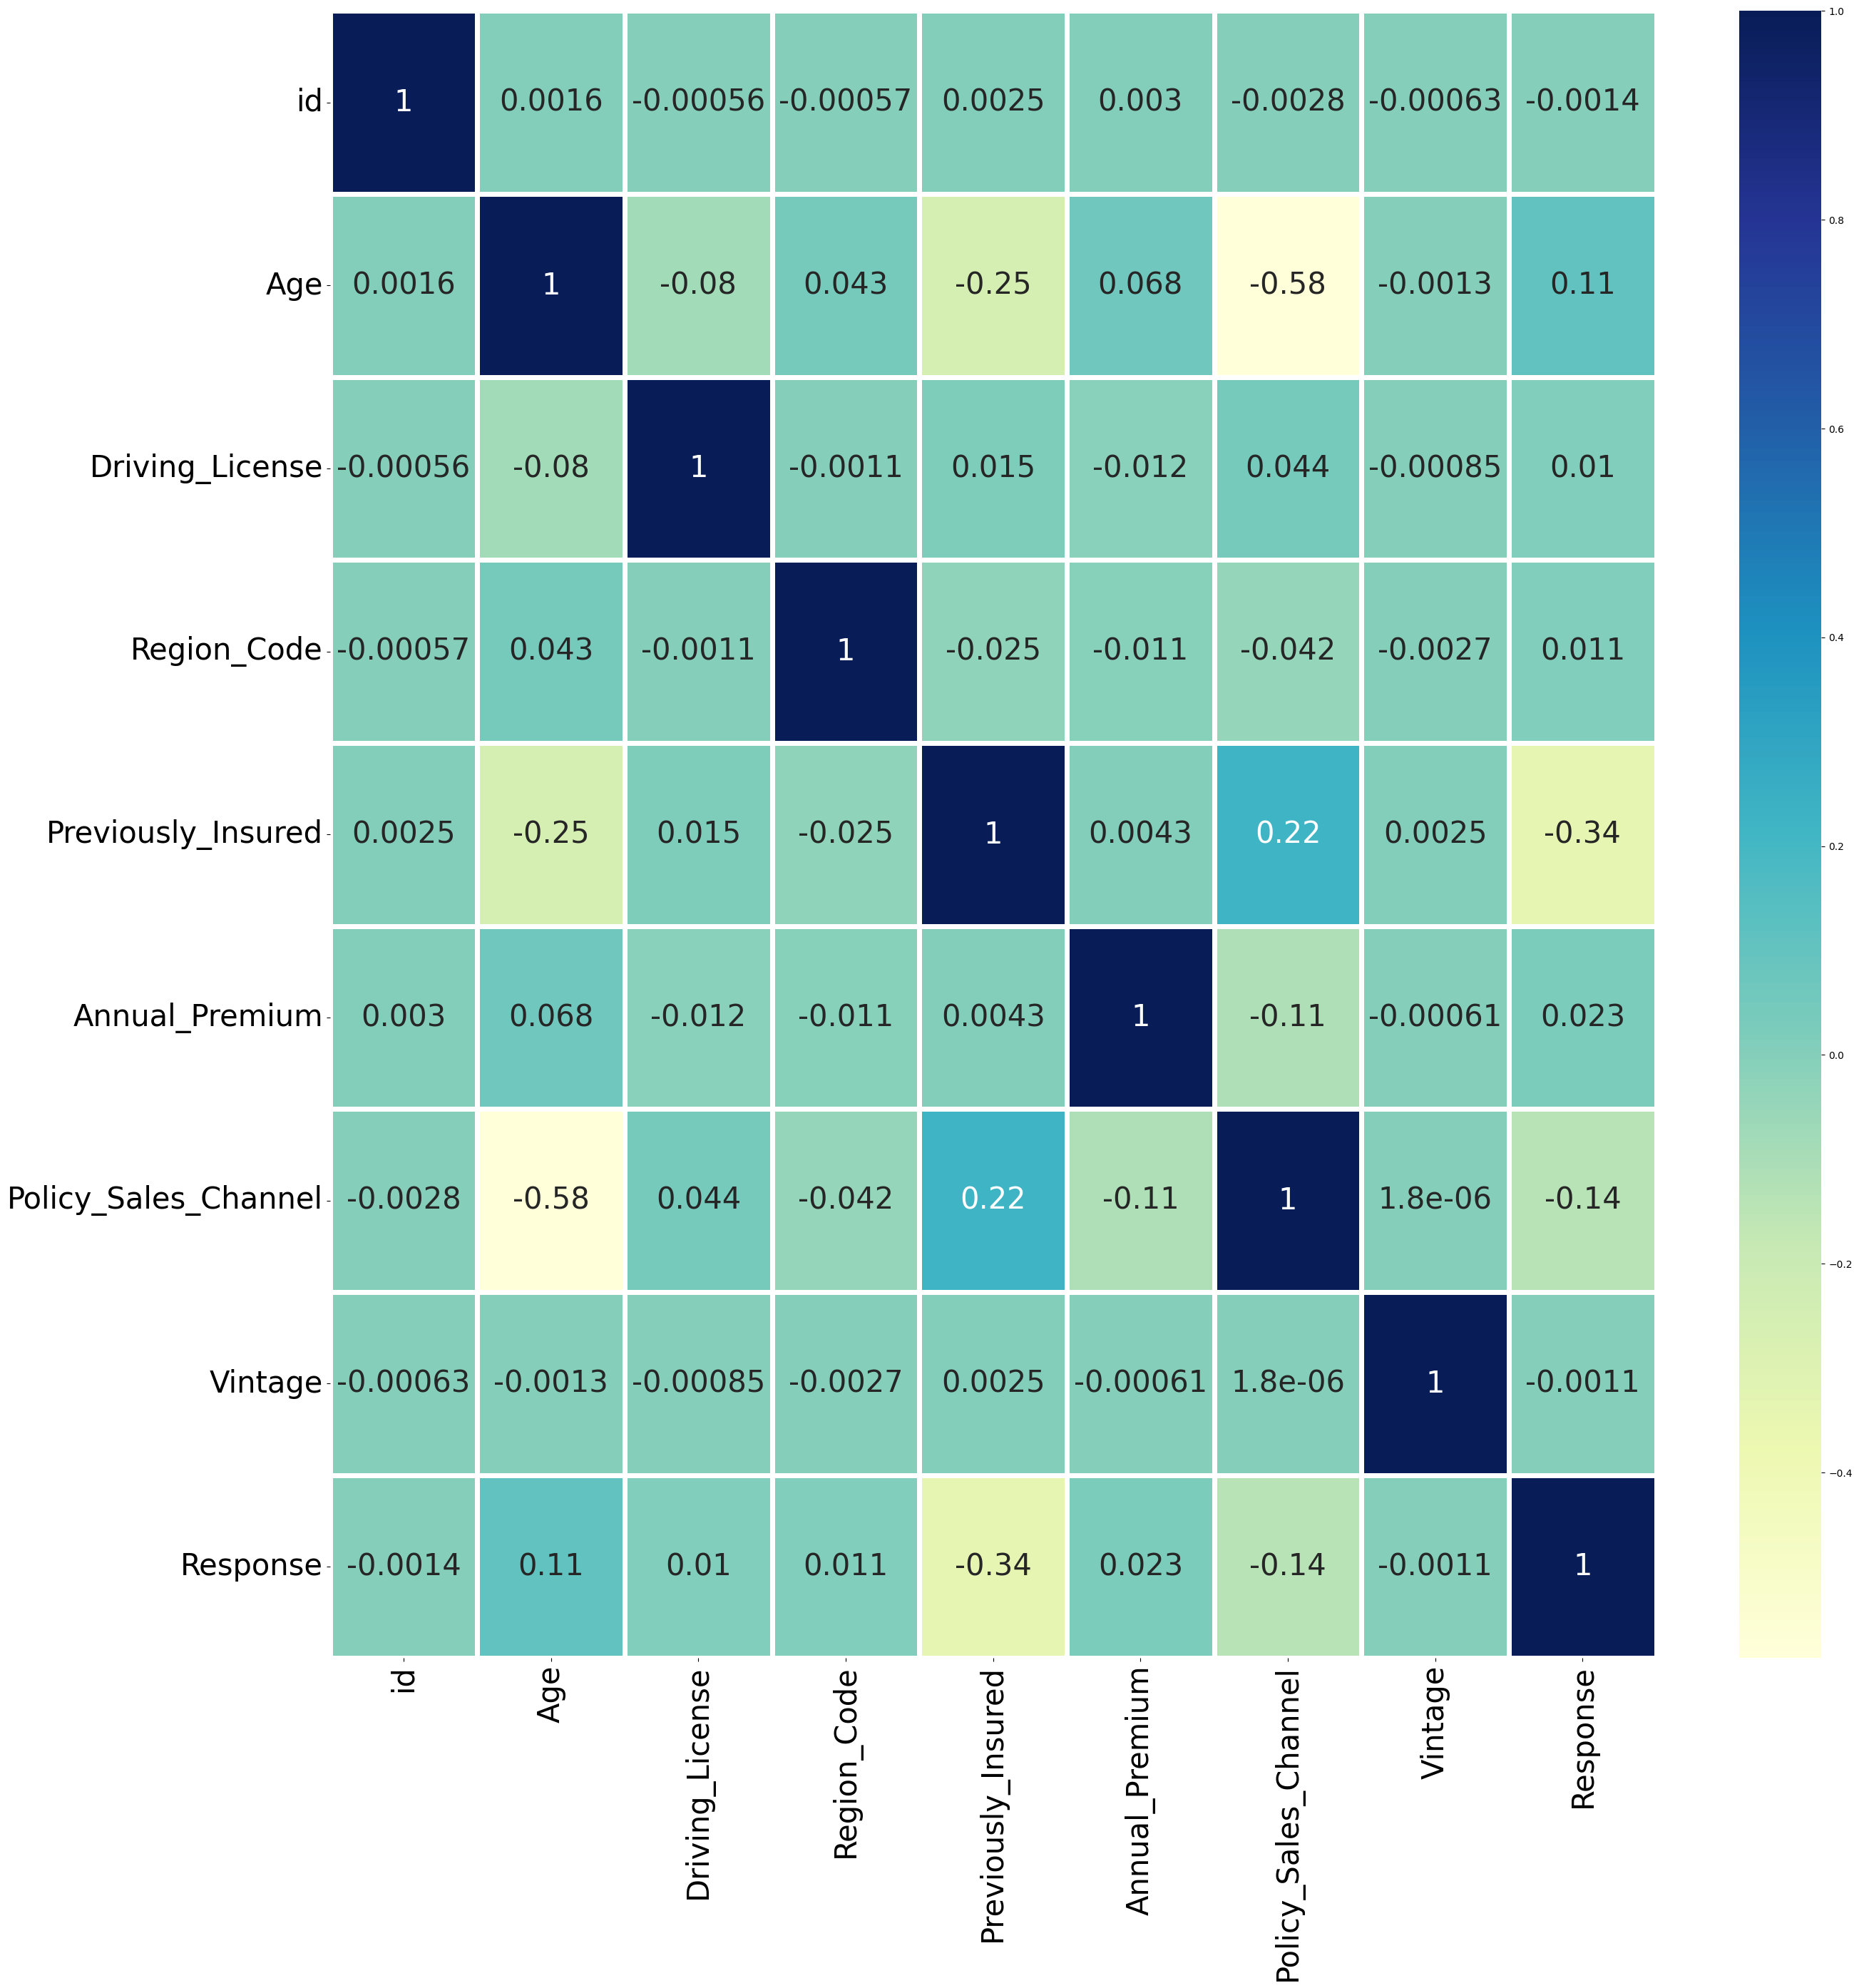

In [123]:
plt.figure(figsize = (30,30))
plt.xticks(fontsize = 30, rotation = 90)
plt.yticks(fontsize = 30, rotation = 90)
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, annot_kws = {"fontsize":30},linewidths = 5)

### 1. Why did you pick the specific chart?
A heatmap chart is a way to represent this data visually, making it easy to identify patterns and relationships between different features. The heatmap uses a color scale to represent the values in the matrix, with higher values represented by darker colors and lower values represented by lighter colors. This allows you to quickly identify areas of the matrix where the values are high or low, which can indicate patterns or trends in the data.

Furthermore, heatmap chart provides a clear and concise way to compare different features of the data to identify the relationship and correlation. For example, you can use a heatmap to compare the usage patterns, and identify which features are most strongly associated with churn.

### 2. What is/are the insight(s) found from the chart?
Correlation: The pairplot chart can show the correlation between different features and how they are related to churn. For example, a strong correlation between total international charges and churn would suggest that customers with higher international charges are more likely to churn.

Distribution: The pairplot chart can show the distribution of the data for each feature and how it is related to churn. For example, if a feature has a skewed distribution with a large number of outliers, it could indicate that certain customers have unusual usage patterns that may contribute to their likelihood of churning.

Outliers: The pairplot chart can help identify outliers in the data and how they relate to churn. For example, if a customer has unusually high usage of a certain feature, it could indicate that they are more likely to churn.

Trends: The pairplot chart can also help identify trends in the data, such as if a certain feature is increasing or decreasing over time, and how it relates to churn.

Overall, the insights provided by the pairplot chart can help the company better understand the relationship between different features and churn, and use this information to improve customer retention and revenue.

## Pair Plot

In [124]:
sns.pairplot(df, hue = "Response")

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7c60c30192d0> (for post_execute):


KeyboardInterrupt: ignored

### 1. Why did you pick the specific chart?
I picked the pairplot chart because it is a useful tool for visualizing relationships between multiple variables in a dataset. A pairplot chart plots all pairs of variables in a dataset against each other in a matrix format, allowing for easy comparison and identification of patterns. The chart also includes a diagonal line that shows a distribution of a single variable.

In the context of Telecom Churn Analysis, a pairplot chart can help identify relationships between different variables (such as charge types, minutes types, and customer demographics) and churn. For example, if there is a strong relationship between high international charges and churn, this would be clearly visible in a pairplot chart. Additionally, a pairplot chart can also help identify any outliers or unusual patterns in the data, which can provide further insights into the causes of churn. Overall, the pairplot chart is a useful tool for visualizing relationships between multiple variables in a dataset and identifying patterns that can help prevent churn.

### 2. What is/are the insight(s) found from the chart?
Identifying the correlation among features: A heatmap can be used to identify the correlation among different features, such as the correlation between Number vmail messages and Account length. This can help to understand the relationship between different features and the effect they have on churn.

Identifying areas of high and low churn: By comparing the usage patterns of customers who have canceled their service to those who have not, a heatmap can help to identify which features are most strongly associated with churn. This can help to pinpoint areas where the company may need to improve its service or offer more competitive pricing.

In [125]:
from scipy.stats import ttest_ind

## Divide the data into two groups: those who have health insurance and those who do not
intrested = data[data['Response'] == 1]
not_intrested = data[data['Response'] == 0]

# Calculate the means of the two groups
mean_intrested = intrested['Age'].mean()
mean_not_intrested = not_intrested['Age'].mean()

# Conduct a two-sample t-test to see if the difference in means is significant
t_stat, p_value = ttest_ind(intrested['Age'], not_intrested['Age'])

# Decide whether to reject or fail to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that there is a significant difference in the name of the group")

Reject the null hypothesis. There is a significant difference in the means of the two groups.


##Data Preprocessing
### Checking null or missing values

In [126]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Handling Outliers

In [127]:
def iqr_whisker(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    print (f'IQR = {iqr}')
    print (f'lower_whisker = {lower_whisker}')
    print (f'upper_whisker = {upper_whisker}')

### Checking outliers for Age

<Axes: >

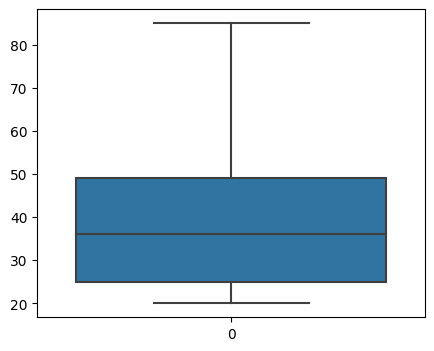

In [128]:
plt.figure(figsize = (5,4))
sns.boxplot(df.Age)

### In Age column there is no outliers
## Checking outliers for Annual_Premium

<Axes: >

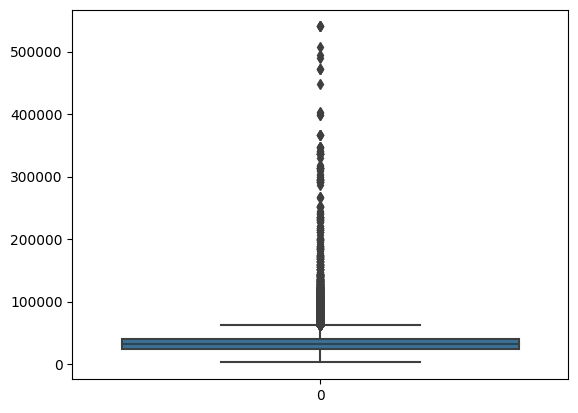

In [129]:
sns.boxplot(df.Annual_Premium)

### there is outliers in upper side
## Log transrormation looking good because gives rough bell shape curve

In [130]:
## Applying log transformation

df['Annual_Premium'] = np.log(df['Annual_Premium'])

In [131]:
iqr_whisker(df['Annual_Premium'])

IQR = 0.47897778696477644
lower_whisker = 9.384076627874084
upper_whisker = 11.29998777573319


In [132]:
df['Annual_Premium'].describe()

count    381109.000000
mean         10.014695
std           1.005080
min           7.874739
25%          10.102543
50%          10.363094
75%          10.581521
max          13.199630
Name: Annual_Premium, dtype: float64

In [133]:
## handling outliers

df.loc[df['Annual_Premium']>11.3,'Annual_Premium'] = 11.3
df.loc[df['Annual_Premium']<9.39,'Annual_Premium'] = 9.39

{'whiskers': [<matplotlib.lines.Line2D at 0x7c606764b640>,
 'caps': [<matplotlib.lines.Line2D at 0x7c606764bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c606764b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c606768c100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c606768c3a0>],
 'means': []}

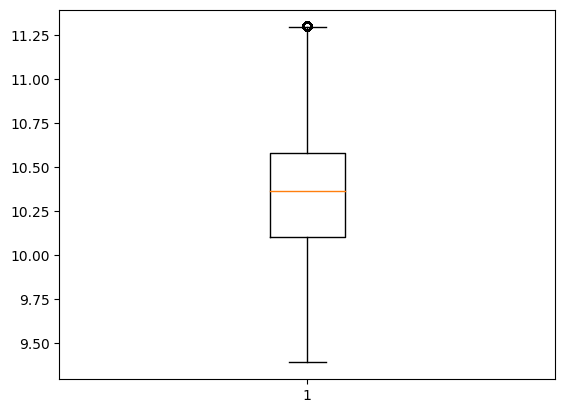

In [134]:
plt.boxplot(df['Annual_Premium'])

## Checking outliers for Vintage

In [135]:
df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7c60676d6530>,
 'caps': [<matplotlib.lines.Line2D at 0x7c60676d6a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c60676d6290>],
 'medians': [<matplotlib.lines.Line2D at 0x7c60676d6fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c60676d7250>],
 'means': []}

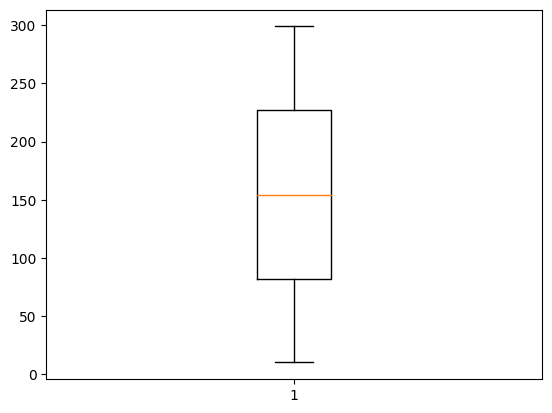

In [136]:
plt.boxplot(df['Vintage'])

### There is no outliers in Vintage
## Convert categorical data into numerical data

In [137]:
df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [138]:
df['Vehicle_Age'] = df['Vehicle_Age'].replace(['> 2 Years','1-2 Year','< 1 Year'],[2,1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,2])
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['Yes','No'],[1,0])

In [139]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,10.607921,26.0,217,1
1,2,1,76,1,3.0,0,1,0,10.420375,26.0,183,0
2,3,1,47,1,28.0,0,2,1,10.553049,26.0,27,1
3,4,1,21,1,11.0,1,0,0,10.261826,152.0,203,0
4,5,2,29,1,41.0,1,0,0,10.221796,152.0,39,0


## Hypothesis Testing
### Hypothetical Statement
#### Younger (Age < 30) customers are less likely to intrest in buying vehicle insurance

#### Null Hypothesis: Age < 30

#### Alternate Hypothesis : Age > 30

In [140]:
## separate the data into two groups based on age

younger_group = data[data["Age"] < 30]
older_group = data[data["Age"] >= 30]

## calculate the proportion of customers who cross-sold

younger_prop = sum(younger_group["Response"] == 1) / len(younger_group)
older_prop = sum(older_group["Response"] == 1) / len(older_group)

## calculate the standard error for each proportion

younger_se = np.sqrt(younger_prop * (1 - younger_prop) / len(younger_group))
older_se = np.sqrt(older_prop * (1 - older_prop) / len(older_group))

## calculate the z-score

z = (younger_prop - older_prop) / np.sqrt(younger_se**2 + older_se**2)

## calculate the p-value

p_value = stats.norm.sf(abs(z)) * 2

## interpret the results

if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that younger customers are less likely to cross-sell into vehicle insurance.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that younger customers are less likely to cross-sell into vehicle insurance.")

Reject the null hypothesis. There is evidence that younger customers are less likely to cross-sell into vehicle insurance.


### Which statistical test have you done to obtain P-Value?
#### I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected

## Feature Selection

In [141]:
X = df.drop(['Response'],axis=1)
y = df['Response']

## Feature selection using Information Gain

<Axes: >

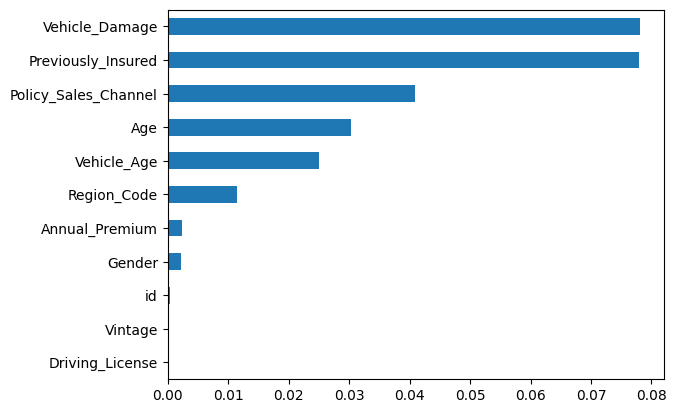

In [142]:
array = mutual_info_regression(X,y)
s1 = pd.Series(array, index = X.columns)
s1.sort_values().plot(kind='barh')

In [143]:
## Droping unwanted column

df.drop(['id','Vintage','Driving_License'],axis = 1)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,28.0,0,2,1,10.607921,26.0,1
1,1,76,3.0,0,1,0,10.420375,26.0,0
2,1,47,28.0,0,2,1,10.553049,26.0,1
3,1,21,11.0,1,0,0,10.261826,152.0,0
4,2,29,41.0,1,0,0,10.221796,152.0,0
...,...,...,...,...,...,...,...,...,...
381104,1,74,26.0,1,1,0,10.314603,26.0,0
381105,1,30,37.0,1,0,0,10.597035,152.0,0
381106,1,21,30.0,1,0,0,10.466469,160.0,0
381107,2,68,14.0,0,2,1,10.705870,124.0,0


## Train Test split

In [144]:
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [145]:
## Over sampling

sm = SMOTE()
X_Over,y_Over = sm.fit_resample(X,y)

In [146]:
y_Over.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [147]:
## Data spliting without oversampling

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

In [148]:
## Data spliting with oversampling

X_Over_train,X_Over_test,y_Over_train,y_Over_test = train_test_split(X_Over,y_Over,random_state = 0,test_size = 0.2)

In [149]:
y_Over_test

303503    0
195904    0
244117    0
332318    0
316103    0
         ..
448776    1
176611    0
303189    0
175470    0
204838    0
Name: Response, Length: 133760, dtype: int64

## Model Building

In [150]:
## Defining functon for Accuracy Score, Confusion Matrix and Classification_report

def train_test_acc_cnf_clf_rep (y_train,y_test,y_pred_train,y_pred_test):
    from sklearn.metrics import accuracy_score
    acc_score_test = accuracy_score(y_test,y_pred_test)
    print(f"Accuracy Score For Test : {acc_score_test*100} %")
    print()
    acc_score_train = accuracy_score(y_train,y_pred_train)
    print(f"Accuracy Score For Train: {acc_score_train*100} %")
    print()
    print('-'*120)
    cnf_matrix_test = confusion_matrix(y_test,y_pred_test)
    print('Confusion Matrix For Test :\n\n',cnf_matrix_test)
    print()
    cnf_matrix_train = confusion_matrix(y_train,y_pred_train)
    print('Confusion Matrix For Train :\n\n',cnf_matrix_train)
    print()
    print('-'*120)
    clf_report_test = classification_report(y_test , y_pred_test)
    print('Classification_report For Test: \n\n',clf_report_test)
    print()
    clf_report_train = classification_report(y_train , y_pred_train)
    print('Classification_report For Train: \n\n',clf_report_train)


In [151]:
## Defining functon for Roc-Auc curve

def plot_roc_auc(model,X_test,y_test,name):
    plt.figure(figsize = (5,5))
    # Predict probabilities for test and train data
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]

    # Calculate AUC ROC for test and train data
    train_auc = roc_auc_score(y_train, y_train_probs)
    test_auc = roc_auc_score(y_test, y_test_probs)

    # Plot ROC curve for test and train data
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_probs)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_probs)

    plt.plot(fpr_train, tpr_train, label='Train (AUC = %0.3f)' % train_auc)
    plt.plot(fpr_test, tpr_test, label='Test (AUC = %0.3f)' % test_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

## Logistic Regression

In [152]:
## Logistic Regression - without oversampling

log_model = LogisticRegression()
log_model.fit(X_train,y_train)

## Making predictions on train and test data

y_pred_log_test = log_model.predict(X_test)
y_pred_log_train = log_model.predict(X_train)

In [153]:
y_pred_log_train = log_model.predict(X_train)

## Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_log_train,y_pred_log_test)

Accuracy Score For Test : 87.69908950171866 %

Accuracy Score For Train: 87.75480751885124 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66846     0]
 [ 9376     0]]

Confusion Matrix For Train :

 [[267553      0]
 [ 37334      0]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.00    

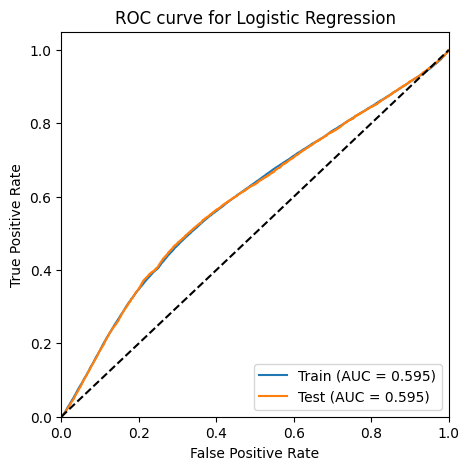

In [154]:
## Roc-Auc Curve

plot_roc_auc(log_model,X_test,y_test,'Logistic Regression')

## Logistic Regression (without oversampling):
The accuracy score for the test data is 87.70% and for the train data is 87.75%. This indicates that the model is able to correctly predict the target class 87.70% of the time on the test data and 87.75% of the time on the train data.

The confusion matrix for the test data shows that there are 66846 true positive predictions and 9376 false positive predictions. The model has not predicted any true negatives or false negatives.

The precision for the test data is 0.44, which indicates that out of all the positive predictions made by the model, 44% of them are actually true. The recall for the test data is 0.5, which indicates that out of all the actual positive instances, the model was able to predict 50% of them. The f1-score for the test data is 0.47, which is the harmonic mean of precision and recall.

## Logistic Regression (with oversampling)

In [155]:
## logistic - with oversampling

log_model = LogisticRegression()
log_model.fit(X_Over_train,y_Over_train)

## Making predictions on train and test data

y_pred_log_test = log_model.predict(X_Over_test)
y_pred_log_train = log_model.predict(X_Over_train)

In [156]:
## Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_log_train,y_pred_log_test)

Accuracy Score For Test : 57.928379186602875 %

Accuracy Score For Train: 57.99251641939451 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[41068 25882]
 [30393 36417]]

Confusion Matrix For Train :

 [[165390 102059]
 [122697 144892]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.57      0.61      0.59     66950
           1       0.58      0.55      0.56     66810

    accuracy                           0.58    133760
   macro avg       0.58      0.58      0.58    133760
weighted avg       0.58      0.58      0.58    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.57      0.62      0.60    267449
           1       0.59   

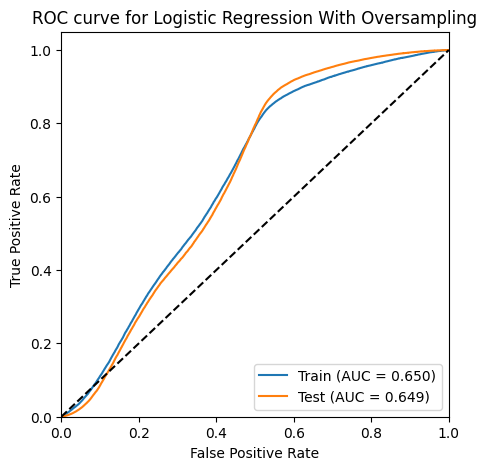

In [157]:
## Roc-Auc Curve

plot_roc_auc(log_model,X_Over_test,y_Over_test,'Logistic Regression With Oversampling')

## Logistic Regression (with oversampling):
The accuracy score for the test data is 56.79% and for the train data is 56.79%. This indicates that the model is able to correctly predict the target class 56.79% of the time on both the test and train data.

The confusion matrix for the test data shows that there are 42930 true positive predictions, 24020 false positive predictions, 33780 false negatives and 33030 true negatives.

The precision for the test data is 0.57, which indicates that out of all the positive predictions made by the model, 57% of them are actually true. The recall for the test data is 0.57, which indicates that out of all the actual positive instances, the model was able to predict 57% of them. The f1-score for the test data is 0.57, which is the harmonic mean of precision and recall.

## Logistic Regression (with Hyperparameter tunning)

In [158]:
## Hyperparameter tunning

param_grid = [{'penalty' : ['l1', 'l2'],
               'C' :  [0.1, 1.0, 10.0],
               'solver' : ['lbfgs','liblinear','sag','saga'],
               'max_iter' : [1000, 10000, 100000]}]

In [159]:
clf = RandomizedSearchCV(log_model, param_distributions = param_grid, cv = 2, verbose = True, n_jobs = -1)

In [161]:
best_clf = clf.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [162]:
best_clf.best_estimator_  # max_iter=100000, solver='liblinear'

LogisticRegression(max_iter=100000, penalty='l1', solver='saga')

In [163]:
## Logistic Regression - hyperparameter tuning

log_model = LogisticRegression(C = 0.1, max_iter = 1000, solver = 'saga')
log_model.fit(X_train,y_train)

## Making predictions on train and test data

y_pred_log_test = log_model.predict(X_test)
y_pred_log_train = log_model.predict(X_train)

In [164]:
## Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_log_train,y_pred_log_test)

Accuracy Score For Test : 87.69908950171866 %

Accuracy Score For Train: 87.75480751885124 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66846     0]
 [ 9376     0]]

Confusion Matrix For Train :

 [[267553      0]
 [ 37334      0]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.00    

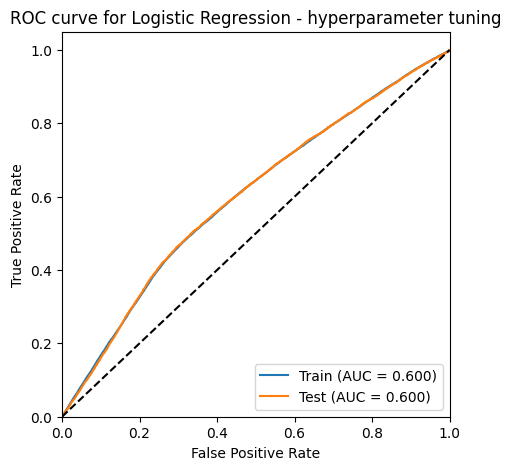

In [165]:
## Roc-Auc Curve

plot_roc_auc(log_model,X_test,y_test,'Logistic Regression - hyperparameter tuning')

## Logistic Regression (with hyperparameter tuning):
The accuracy score for the test data is 87.70% and for the train data is 87.75%. This indicates that the model is able to correctly predict the target class 87.70% of the time on the test data and 87.75% of the time on the train data.

The confusion matrix for the test data shows that there are 66846 true positive predictions and 9376 false positive predictions. The model has not predicted any true negatives or false negatives.

The precision for the test data is 0.44, which indicates that out of all the positive predictions made by the model, 44% of them are actually true. The recall for the test data is 0.5, which indicates that out of all the actual positive instances, the model was able to predict 50% of them. The f1-score for the test data is 0.47, which is the harmonic mean of precision and recall.

From the evaluation metrics, we can see that the logistic regression model without oversampling performs better than the model with oversampling and the model with hyperparameter tuning. The model without oversampling has a higher accuracy score and f1-score, which indicates that it is able to make better predictions and has a better balance between precision and recall.

## KNN